In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Legal Summary Data Clean

In [87]:
january_summary = pd.read_excel('Monthly Summary Report (2025-01).xlsx', dtype=str, keep_default_na=False)
january_summary['Month'] = '2025-01'
february_summary = pd.read_excel('Monthly Summary Report (2025-02).xlsx', dtype=str, keep_default_na=False)
february_summary['Month'] = '2025-02'
march_summary = pd.read_excel('Monthly Summary Report (2025-03).xlsx', dtype=str, keep_default_na=False)
march_summary['Month'] = '2025-03'
## No April Data Yet?
may_summary = pd.read_excel('Monthly Summary Report (2024-05).xlsx', dtype=str, keep_default_na=False)
may_summary['Month'] = '2024-05'
june_summary = pd.read_excel('Monthly Summary Report (2024-06).xlsx', dtype=str, keep_default_na=False)
june_summary['Month'] = '2024-06'
july_summary = pd.read_excel('Monthly Summary Report (2024-07).xlsx', dtype=str, keep_default_na=False)
july_summary['Month'] = '2024-07'
august_summary = pd.read_excel('Monthly Summary Report (2024-08).xlsx', dtype=str, keep_default_na=False)
august_summary['Month'] = '2024-08'
september_summary = pd.read_excel('Monthly Summary Report (2024-09).xlsx', dtype=str, keep_default_na=False)
september_summary['Month'] = '2024-09'
october_summary = pd.read_excel('Monthly Summary Report (2024-10).xlsx',dtype=str, keep_default_na=False)
october_summary['Month'] = '2024-10'
november_summary = pd.read_excel('Monthly Summary Report (2024-11).xlsx', dtype=str, keep_default_na=False)
november_summary['Month'] = '2024-11'
december_summary = pd.read_excel('Monthly Summary Report (2024-12).xlsx', dtype=str, keep_default_na=False)
december_summary['Month'] = '2024-12'

/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-pack

In [88]:
def header_cleaning(df):
    df.rename(columns={'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Legal_Menu_Option',
                       'Time Zone: (UTC-06:00) Central Standard Time (America/Chicago)': 'Legal_Menu_Option',
                       'Unnamed: 1': 'Menu_Selection',
                       'Unnamed: 2': 'Queue_Selection',
                       'Unnamed: 3': 'Group_Suboption',
                       'Unnamed: 4': 'First_Queue_Name',
                       'Unnamed: 5': 'Final_Queue_Name',
                       'Unnamed: 6': 'Total_Calls',
                       'Unnamed: 7': 'Live_Queued_Calls',
                       'Unnamed: 8': 'Callback_Queued_Calls',
                       'Unnamed: 9': 'Closed_Queue_Calls',
                       'Unnamed: 10': 'Abandoned_Calls'
                       }, inplace= True)
    df = df.iloc[2:]
    df.replace('', pd.NA, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.reset_index(inplace = True, drop = True)
    return df

In [89]:
january_summary = header_cleaning(january_summary)
february_summary = header_cleaning(february_summary)
march_summary = header_cleaning(march_summary)
may_summary = header_cleaning(may_summary)
june_summary = header_cleaning(june_summary)
july_summary = header_cleaning(july_summary)
august_summary = header_cleaning(august_summary)
september_summary = header_cleaning(september_summary)
october_summary = header_cleaning(october_summary)
november_summary = header_cleaning(november_summary)
december_summary = header_cleaning(december_summary)

all_datasets = [january_summary, february_summary, march_summary, may_summary, june_summary, july_summary, august_summary, september_summary, october_summary, november_summary, december_summary]

/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_43815/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', pd.NA, inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_43815/1202797010.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_43815/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [90]:
combined = pd.DataFrame(columns=january_summary.columns)
for dataset in all_datasets:
    combined = pd.concat([combined, dataset[:len(dataset) - 1]], axis = 0)

In [91]:
combined["Total_Calls"] = pd.to_numeric(combined["Total_Calls"], errors="coerce")
combined["Live_Queued_Calls"] = pd.to_numeric(combined["Live_Queued_Calls"], errors="coerce")
combined["Callback_Queued_Calls"] = pd.to_numeric(combined["Callback_Queued_Calls"], errors="coerce")
combined["Closed_Queue_Calls"] = pd.to_numeric(combined["Closed_Queue_Calls"], errors="coerce")
combined["Abandoned_Calls"] = pd.to_numeric(combined["Abandoned_Calls"], errors="coerce")


In [92]:
abandonment_rates = combined.groupby('Legal_Menu_Option').agg(
    Total_Calls=('Total_Calls', 'sum'),
    Abandoned_Calls=('Abandoned_Calls', 'sum')
).reset_index()
abandonment_rates['Abandonment_Rate'] = abandonment_rates['Abandoned_Calls'] / abandonment_rates['Total_Calls']

abandonment_rates = abandonment_rates.sort_values('Abandonment_Rate', ascending=False)

abandonment_rates

,Legal_Menu_Option,Total_Calls,Abandoned_Calls,Abandonment_Rate
11,Pre-Legal Seniors,7657,798,0.104218
8,Immigration,2217,57,0.025710
2,Consumer,3740,93,0.024866
0,ADAPT,1047,25,0.023878
1,Benefits,4665,107,0.022937
3,Criminal Records,1260,28,0.022222
5,Family,13229,276,0.020863
4,Employment,2517,43,0.017084
7,Housing,9771,161,0.016477
6,HIV,1008,9,0.008929


In [93]:
combined['Call_Path'] = (combined['Legal_Menu_Option'].astype(str) + ' > ' +
                   combined['Menu_Selection'].astype(str) + ' > ' +
                   combined['Queue_Selection'].astype(str) + ' > ' +
                   combined['First_Queue_Name'].astype(str) + ' > ' +
                   combined['Final_Queue_Name'].astype(str))


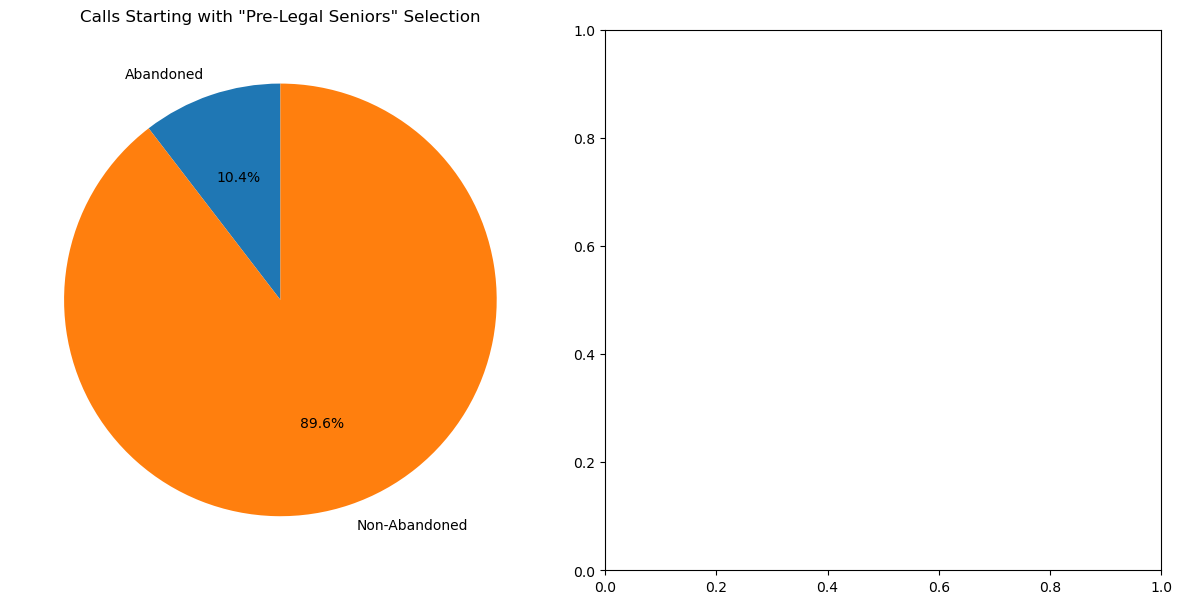

In [94]:
import matplotlib.pyplot as plt

pre_legal_df = combined[combined['Call_Path'].str.startswith('Pre-Legal Seniors')]
pre_legal_abandoned = pre_legal_df['Abandoned_Calls'].sum()
pre_legal_total = pre_legal_df['Total_Calls'].sum()
pre_legal_completed = pre_legal_total - pre_legal_abandoned



fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie([pre_legal_abandoned, pre_legal_completed],
            labels=['Abandoned', 'Non-Abandoned'],
            autopct='%1.1f%%',
            startangle=90)
axes[0].set_title('Calls Starting with "Pre-Legal Seniors" Selection')


plt.tight_layout()
plt.show()


In [95]:
combined[['Call_Path','Total_Calls']].tail(5)

,Call_Path,Total_Calls
205,Pre-Legal Seniors > N/A > SubSenior Other > Other SubSeniors > Other SubSeniors,3
206,Pre-Legal Seniors > N/A > SubSenior Other > SubSenior Other > SubSenior Other,50
207,Pre-Legal Seniors > N/A > SubSenior Other > SubSenior Other SP > SubSenior Other SP,2
208,Pre-Legal Seniors > N/A > SubSenior Tenant > N/A > N/A,14
209,Pre-Legal Seniors > N/A > SubSenior Tenant > SubSenior Tenant > SubSenior Tenant,30


In [96]:
combined['Live_Queued_Calls'].sum()/combined['Total_Calls'].sum()

0.024600226887752725

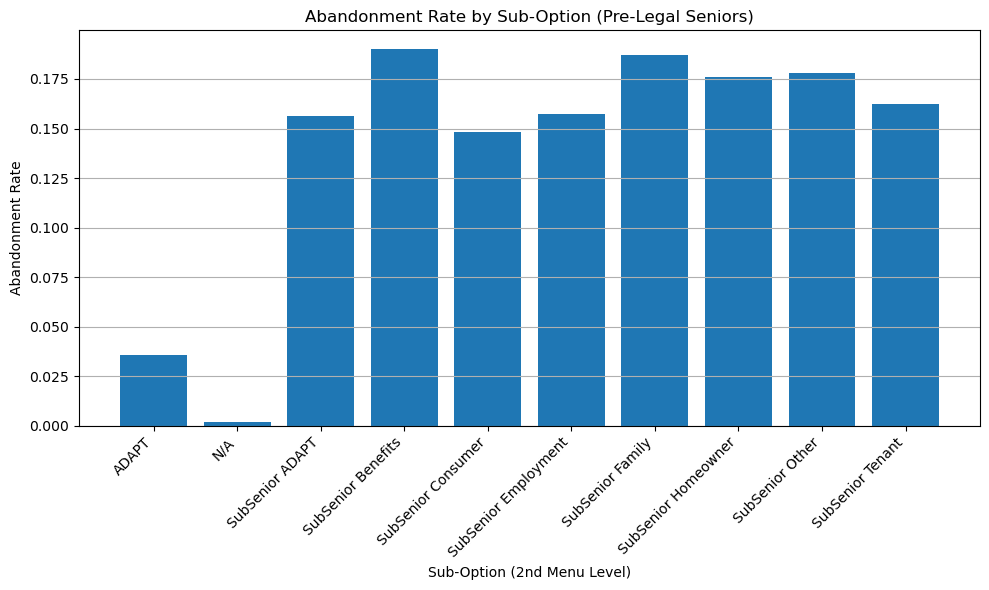

In [97]:
prelegal_df['SubSelection'] = prelegal_df['Call_Path'].str.split(' > ').str[2]

abandonment_stats = prelegal_df.groupby('SubSelection').agg({
    'Total_Calls': 'sum',
    'Abandoned_Calls': 'sum'
}).reset_index()

abandonment_stats['Abandonment_Rate'] = abandonment_stats['Abandoned_Calls'] / abandonment_stats['Total_Calls']

plt.figure(figsize=(10, 6))
plt.bar(abandonment_stats['SubSelection'], abandonment_stats['Abandonment_Rate'])
plt.title('Abandonment Rate by Sub-Option (Pre-Legal Seniors)')
plt.xlabel('Sub-Option (2nd Menu Level)')
plt.ylabel('Abandonment Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [98]:
abandonment_stats['Total_Calls'].sum()

7657

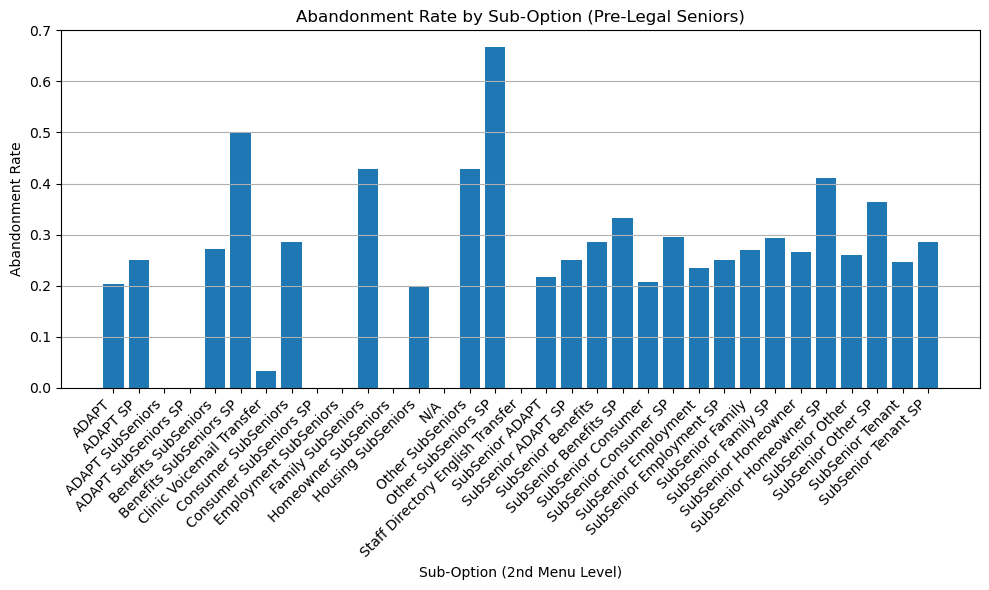

In [99]:
prelegal_df['SubOption'] = prelegal_df['Call_Path'].str.split(' > ').str[3]

abandonment_stats = prelegal_df.groupby('SubOption').agg({
    'Total_Calls': 'sum',
    'Abandoned_Calls': 'sum'
}).reset_index()

abandonment_stats['Abandonment_Rate'] = abandonment_stats['Abandoned_Calls'] / abandonment_stats['Total_Calls']

plt.figure(figsize=(10, 6))
plt.bar(abandonment_stats['SubOption'], abandonment_stats['Abandonment_Rate'])
plt.title('Abandonment Rate by Sub-Option (Pre-Legal Seniors)')
plt.xlabel('Sub-Option (2nd Menu Level)')
plt.ylabel('Abandonment Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [100]:
special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']

special_df = combined[combined['Final_Queue_Name'].str.contains('|'.join(special_lines), case=False, na=False)]

direct_calls = special_df[special_df['Menu_Selection'].isna() | (special_df['Menu_Selection'] == 'N/A')]['Total_Calls'].sum()
transferred_calls = special_df[~special_df['Menu_Selection'].isna() & (special_df['Menu_Selection'] != 'N/A')]['Total_Calls'].sum()

total_special_calls = direct_calls + transferred_calls
direct_percent = direct_calls / total_special_calls
transferred_percent = transferred_calls / total_special_calls

print(f"Direct calls: {direct_calls} ({direct_percent:.2%})")
print(f"Transferred calls: {transferred_calls} ({transferred_percent:.2%})")

Direct calls: 6637 (73.43%)
Transferred calls: 2402 (26.57%)


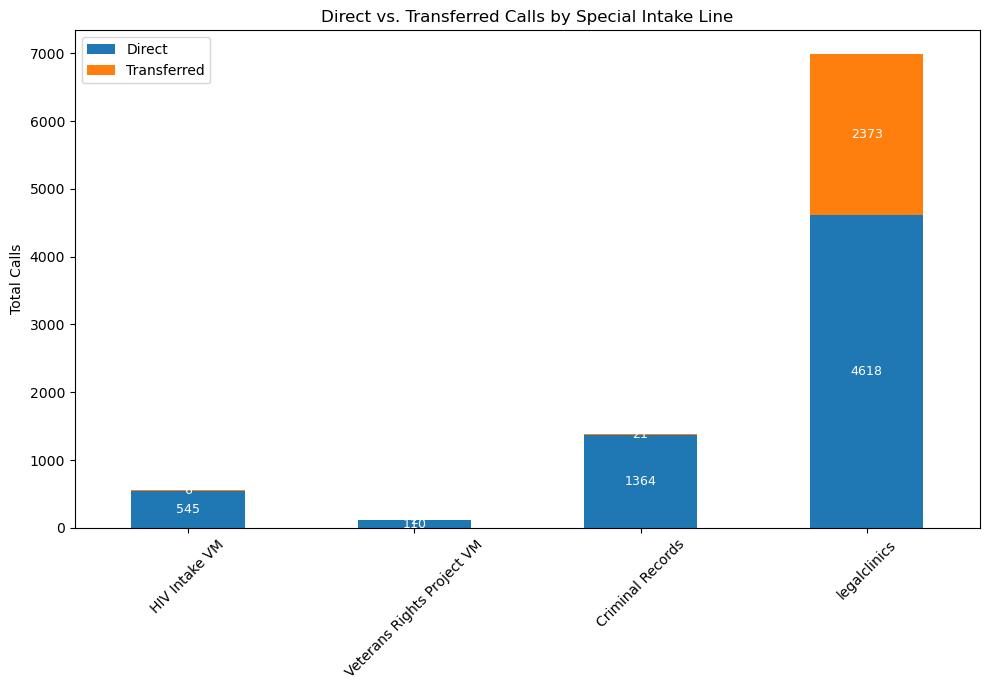

In [101]:

special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']
display_labels = ['HIV Intake VM', 'Veterans Rights Project VM', 'Criminal Records', 'legalclinics']
results = []

for line in special_lines:
    line_df = combined[combined['Final_Queue_Name'].str.contains(line, case=False, na=False)]
    direct = line_df[line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    transferred = line_df[~line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    results.append({'Line': line, 'Direct': direct, 'Transferred': transferred})

results_df = pd.DataFrame(results)
results_df.index = display_labels  
results_df = results_df[['Direct', 'Transferred']]

ax = results_df.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Direct vs. Transferred Calls by Special Intake Line')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.tight_layout()

for i, (index, row) in enumerate(results_df.iterrows()):
    y_offset = 0
    for col in results_df.columns:
        height = row[col]
        if height > 0:
            ax.text(i, y_offset + height / 2, str(int(height)), ha='center', va='center', fontsize=9, color='white')
            y_offset += height

plt.show()


In [102]:
results_df

,Direct,Transferred
HIV Intake VM,545,6
Veterans Rights Project VM,110,2
Criminal Records,1364,21
legalclinics,4618,2373


In [103]:
clinic_df = combined[combined['Final_Queue_Name'].str.contains('Clinic', case=False, na=False)]
direct_calls = clinic_df[clinic_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
transferred_calls = clinic_df[~clinic_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()

print(f"Direct: {direct_calls}, Transferred: {transferred_calls}")


Direct: 4618, Transferred: 2373


In [104]:
spanish_df = combined[combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]
direct_sp = spanish_df[spanish_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
transferred_sp = spanish_df[~spanish_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()

print(f"Direct: {direct_sp}, Transferred: {transferred_sp}")


Direct: 587, Transferred: 28


In [105]:
spanish_outcomes = spanish_df[['Live_Queued_Calls', 'Callback_Queued_Calls', 
                               'Closed_Queue_Calls', 'Abandoned_Calls']].sum()

spanish_outcomes_pct = (spanish_outcomes / spanish_df['Total_Calls'].sum()) * 100
spanish_outcomes_pct.round(2)


Live_Queued_Calls        19.51
Callback_Queued_Calls    75.93
Closed_Queue_Calls        0.00
Abandoned_Calls          20.65
dtype: float64

In [106]:
sp_calls = combined[combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]

regular_calls = combined[~combined['Final_Queue_Name'].str.contains('SP', case=False, na=False)]

sp_total = sp_calls['Total_Calls'].astype(float).sum()
regular_total = regular_calls['Total_Calls'].astype(float).sum()
combined_total = sp_total + regular_total

sp_pct = (sp_total / combined_total) * 100
regular_pct = (regular_total / combined_total) * 100

print(f"Spanish (SP) Calls: {sp_total:.0f} ({sp_pct:.2f}%)")
print(f"Regular Calls: {regular_total:.0f} ({regular_pct:.2f}%)")


Spanish (SP) Calls: 615 (0.96%)
Regular Calls: 63734 (99.04%)


In [107]:
senior_df = combined[combined['Final_Queue_Name'].str.contains('Senior', case=False, na=False)]
senior_live_rate = senior_df['Live_Queued_Calls'].sum() / senior_df['Total_Calls'].sum()
print(f"Senior live service rate: {senior_live_rate:.2%}")


Senior live service rate: 33.61%


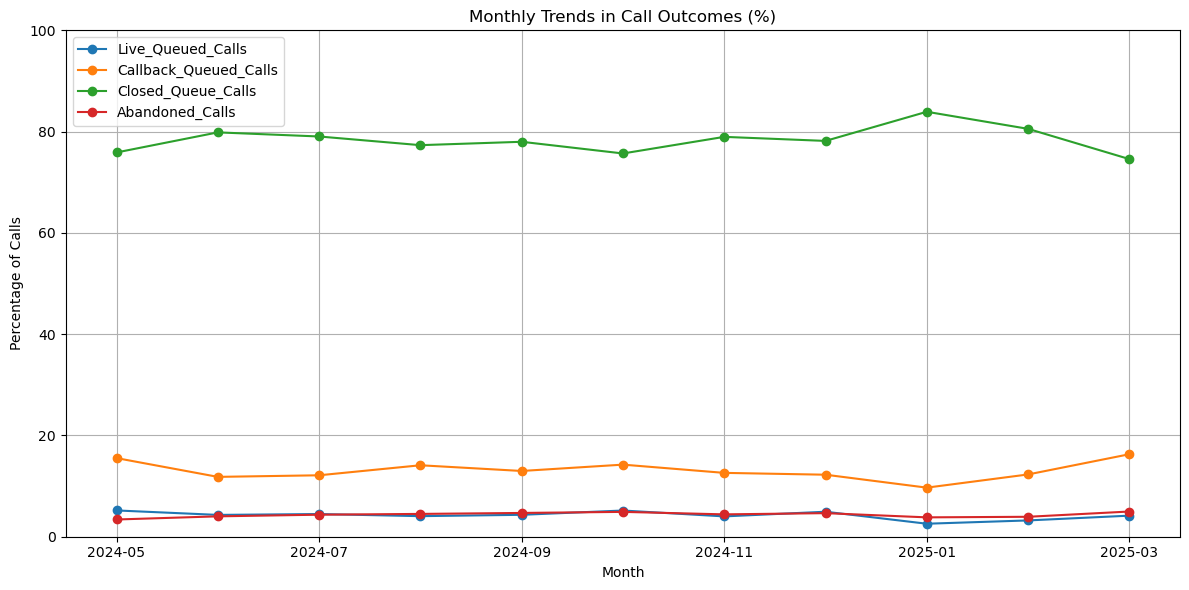

In [108]:
monthly = combined.groupby('Month')[['Live_Queued_Calls', 'Callback_Queued_Calls', 
                               'Closed_Queue_Calls', 'Abandoned_Calls']].sum()

monthly_pct = monthly.div(monthly.sum(axis=1), axis=0) * 100

monthly_pct.plot(figsize=(12, 6), marker='o')

plt.title('Monthly Trends in Call Outcomes (%)')
plt.ylabel('Percentage of Calls')
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()
